In [4]:
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
%matplotlib inline
seed = 0
np.random.seed(seed)
import tensorflow as tf
tf.random.set_seed(seed)
import os
import sys

import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1

from qkeras.qlayers import QDense, QActivation
from qkeras.quantizers import quantized_bits, quantized_relu
import tensorflow.compat.v1 as tf1
from qkeras.utils import model_save_quantized_weights

from tensorflow_model_optimization.python.core.sparsity.keras import prune, pruning_callbacks, pruning_schedule
from tensorflow_model_optimization.sparsity.keras import strip_pruning


from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import random
import math


from tensorflow_model_optimization.python.core.sparsity.keras import prune, pruning_callbacks, pruning_schedule
from tensorflow_model_optimization.sparsity.keras import strip_pruning
from qkeras.utils import model_save_quantized_weights, load_qmodel
import hls4ml
import qkeras.utils

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statistics
import sklearn.linear_model

In [396]:
from importlib import reload
import regression_model_ff as reg_ff
import joblib
import utils
import estimator as est
reload(reg_ff)

<module 'regression_model_ff' from '/home/dmitsas/Downloads/notebooks/regression_model_ff.py'>

## Plot corelation between reuse factor and number of FFs

In [397]:
%%time
loaded_modelscar = reg_ff.regression.load('Cardio')
loaded_modelsbc  = reg_ff.regression.load('breast_cancer')
loaded_modelsarr = reg_ff.regression.load('arrythmia')
loaded_modelsjet = reg_ff.regression.load('jet_tagging')


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model
CPU times: user 10 s, sys: 118 ms, total: 10.1 s
Wall time: 10 s


In [398]:
precision = 8

FF_car = reg_ff.regression.print_resource('cardio',precision,'FF',loaded_modelscar)
DSP_car = reg_ff.regression.print_resource('cardio',precision,'DSP',loaded_modelscar)
FF_bc = reg_ff.regression.print_resource('breast_cancer',precision,'FF',loaded_modelsbc)
DSP_bc = reg_ff.regression.print_resource('breast_cancer',precision,'DSP',loaded_modelsbc)
FF_arr = reg_ff.regression.print_resource('arrythmia',precision,'FF',loaded_modelsarr)
DSP_arr = reg_ff.regression.print_resource('arrythmia',precision,'DSP',loaded_modelsarr)
FF_jet = reg_ff.regression.print_resource('jet_tagging',precision,'FF',loaded_modelsjet)
DSP_jet = reg_ff.regression.print_resource('jet_tagging',precision,'DSP',loaded_modelsjet)

In [399]:
LUT_car = reg_ff.regression.print_resource('cardio',precision,'LUT',loaded_modelscar)
LUT_bc = reg_ff.regression.print_resource('breast_cancer',precision,'LUT',loaded_modelsbc)
LUT_arr = reg_ff.regression.print_resource('arrythmia',precision,'LUT',loaded_modelsarr)
LUT_jet = reg_ff.regression.print_resource('jet_tagging',precision,'LUT',loaded_modelsjet)

LUT1 = np.concatenate((LUT_arr[0],LUT_jet[0],LUT_bc[0],LUT_car[0]))
LUT2 = np.concatenate((LUT_arr[1],LUT_jet[1],LUT_bc[1],LUT_car[1]))
LUT3 = np.concatenate((LUT_jet[2],LUT_bc[2]))
LUT4 = LUT_jet[3]



In [406]:
FF1 = np.concatenate((FF_arr[0],FF_jet[0],FF_bc[0],FF_car[0]))
FF2 = np.concatenate((FF_arr[1],FF_jet[1],FF_bc[1],FF_car[1]))
FF3 = np.concatenate((FF_jet[2],FF_bc[2]))
FF4 = FF_jet[3]

DSP1 = np.concatenate((DSP_arr[0],DSP_jet[0],DSP_bc[0],DSP_car[0]))
DSP2 = np.concatenate((DSP_arr[1],DSP_jet[1],DSP_bc[1],DSP_car[1]))
DSP3 = np.concatenate((DSP_jet[2],DSP_bc[2]))
DSP4 = DSP_jet[3]

In [410]:
FF = np.concatenate((FF1,FF2,FF3,FF4))
DSP = np.concatenate((DSP1,DSP2,DSP3,DSP4))
#LUT = np.concatenate((LUT1,LUT2,LUT3,LUT4))
reuse = np.array([1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100])

In [411]:
FF.shape                  ###### (layers,reuse)

(220, 19)

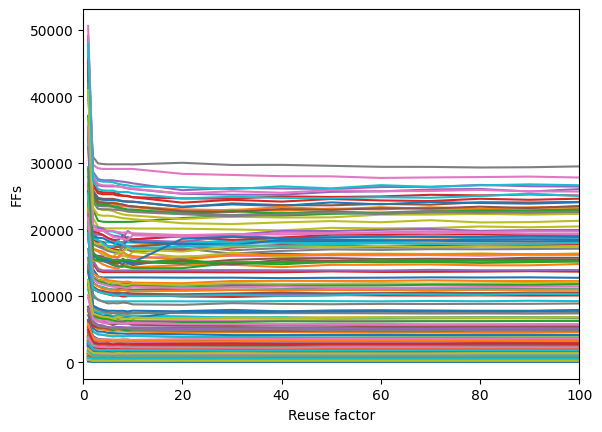

In [421]:
for i in range(len(FF)):
    plt.plot(reuse,FF[i])
    plt.xlabel("Reuse factor")
    plt.ylabel("FFs")
    plt.xlim(0,100)

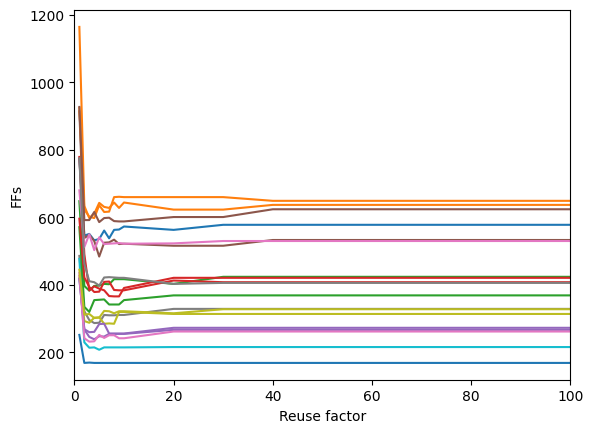

In [423]:
for i in range(len(FF_jet[0][0])):
    plt.plot(reuse,FF_bc[2][i])
    plt.xlabel("Reuse factor")
    plt.ylabel("FFs")
    plt.xlim(0,100)

## Different model for input <x,2> and different for the rest of the layers <x,0>

Each FF_x array is of shape (layer,number_of_models,number_of_reuse). 
The RF_select array selects only one of the available reuse factors to create a linear model between the number of real multiplications(multiplication minus the zeros) and the number of Flip-Flops

In [424]:
%%time
loaded_modelscar = reg_ff.regression.load('Cardio')
loaded_modelsbc  = reg_ff.regression.load('breast_cancer')
loaded_modelsarr = reg_ff.regression.load('arrythmia')
loaded_modelsjet = reg_ff.regression.load('jet_tagging')


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model


... quantizing model
CPU times: user 10.1 s, sys: 90.1 ms, total: 10.2 s
Wall time: 10.1 s


In [439]:
precision = 8
RF_sele = 1

FF_car = reg_ff.regression.print_resource('cardio',precision,'FF',loaded_modelscar)
DSP_car = reg_ff.regression.print_resource('cardio',precision,'DSP',loaded_modelscar)
FF_bc = reg_ff.regression.print_resource('breast_cancer',precision,'FF',loaded_modelsbc)
DSP_bc = reg_ff.regression.print_resource('breast_cancer',precision,'DSP',loaded_modelsbc)
FF_arr = reg_ff.regression.print_resource('arrythmia',precision,'FF',loaded_modelsarr)
DSP_arr = reg_ff.regression.print_resource('arrythmia',precision,'DSP',loaded_modelsarr)
FF_jet = reg_ff.regression.print_resource('jet_tagging',precision,'FF',loaded_modelsjet)
DSP_jet = reg_ff.regression.print_resource('jet_tagging',precision,'DSP',loaded_modelsjet)

In [440]:
%%time
real_muls_arr = reg_ff.regression.get_muls(loaded_modelsarr)
real_muls_jet = reg_ff.regression.get_muls(loaded_modelsjet)
real_muls_bc  = reg_ff.regression.get_muls(loaded_modelsbc)
real_muls_car = reg_ff.regression.get_muls(loaded_modelscar)

CPU times: user 1.67 s, sys: 0 ns, total: 1.67 s
Wall time: 1.66 s


In [441]:
RF_select_rest = np.concatenate((FF_arr[1:2],FF_jet[1:4],FF_bc[1:3],FF_car[1:2]))
DSP_select_rest = np.concatenate((DSP_arr[1:2],DSP_jet[1:4],DSP_bc[1:3],DSP_car[1:2]))

In [442]:
%%time
real_muls_arr_rest = np.delete(real_muls_arr,0,0)
real_muls_jet_rest = np.delete(real_muls_jet,0,0)
real_muls_bc_rest  = np.delete(real_muls_bc,0,0)
real_muls_car_rest = np.delete(real_muls_car,0,0)

real_muls_rest = np.concatenate((real_muls_arr_rest,real_muls_jet_rest,real_muls_bc_rest,real_muls_car_rest))
real_muls_rest = np.array(real_muls_rest)

CPU times: user 213 μs, sys: 0 ns, total: 213 μs
Wall time: 175 μs


In [443]:

reg_model = LinearRegression()
RF_all_rest = RF_select_rest[:,:,RF_sele - 1]    ########## Select only for the specific reuse factor
#RF_all=[]
mull_all_rest = []
for i in range(int((len(loaded_modelsjet[0].layers) - 8 + len(loaded_modelsarr[0].layers)+len(loaded_modelsbc[0].layers) + len(loaded_modelscar[0].layers))/2)):
    #RF_all.append(RF[i])
    mull_all_rest.append(real_muls_rest[i])
    
RF_all_rest=np.array(RF_all_rest)
mull_all_rest = np.array(mull_all_rest)

RF_all_rest = RF_all_rest.reshape(140,)
mull_all_rest = mull_all_rest.reshape(140,)
RF_all_rest = RF_all_rest.reshape(-1,1)
mull_all_rest = mull_all_rest.reshape(-1,1)

DSP_all_rest = DSP_select_rest[:,:,RF_sele - 1]
#RF_all=[]
    #RF_all.append(RF[i])
    
DSP_all_rest=np.array(DSP_all_rest)

DSP_all_rest = DSP_all_rest.reshape(140,)
DSP_all_rest = DSP_all_rest.reshape(-1,1)

combined_rest =  mull_all_rest + DSP_all_rest


In [444]:
mull_all_rest.shape

(140, 1)

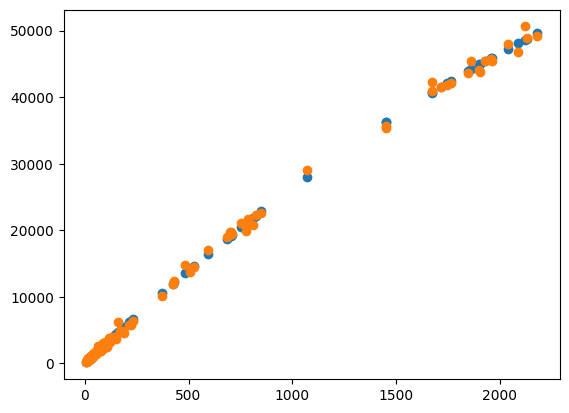

In [445]:
mul_select = {1:mull_all_rest,2:combined_rest}
select = 1

poly_mul_rest = PolynomialFeatures(degree = 3, include_bias=False)
poly_feat_mul_rest = poly_mul_rest.fit_transform(mul_select[select])

poly_reg_model_mul_rest = LinearRegression()
poly_fit_mul_rest = poly_reg_model_mul_rest.fit(poly_feat_mul_rest,RF_all_rest)

y_pred_mul_rest = poly_fit_mul_rest.predict(poly_feat_mul_rest)

plt.scatter(mul_select[select],y_pred_mul_rest)
plt.scatter(mul_select[select],RF_all_rest)

In [446]:
r2_score(RF_all_rest,y_pred_mul_rest)

0.998973142298832

In [447]:
muls_num = [[350]]
poly_ft = poly_mul_rest.fit_transform(muls_num)
poly_reg_model_mul_rest.predict(poly_ft)

array([[9971.21850253]])

### Create linear model for first layers with precision <8,2>

In [448]:
RF_select_one = np.concatenate((FF_arr[0],FF_jet[0],FF_bc[0],FF_car[0]))
DSP_select_one = np.concatenate((DSP_arr[0],DSP_jet[0],DSP_bc[0],DSP_car[0]))

In [449]:
%%time
real_muls_arr_one = real_muls_arr[0]
real_muls_jet_one = real_muls_jet[0]
real_muls_bc_one  = real_muls_bc[0]
real_muls_car_one = real_muls_car[0]

real_muls_one = np.concatenate((real_muls_arr_one,real_muls_jet_one,real_muls_bc_one,real_muls_car_one))
real_muls_one = np.array(real_muls_one)

CPU times: user 0 ns, sys: 271 μs, total: 271 μs
Wall time: 237 μs


In [450]:
#RF_sele = 1


reg_model = LinearRegression()
RF_all_one = RF_select_one[:,RF_sele - 1]
#RF_all=[]
mull_all_one = real_muls_one
    
RF_all_one=np.array(RF_all_one)
mull_all_one = np.array(mull_all_one)

RF_all_one = RF_all_one.reshape(80,)
mull_all_one = mull_all_one.reshape(80,)
RF_all_one = RF_all_one.reshape(-1,1)
mull_all_one = mull_all_one.reshape(-1,1)

DSP_all_one = DSP_select_one[:,RF_sele - 1]    
DSP_all_one=np.array(DSP_all_one)
DSP_all_one = DSP_all_one.reshape(80,)
DSP_all_one = DSP_all_one.reshape(-1,1)

combined_one =  mull_all_one + DSP_all_one


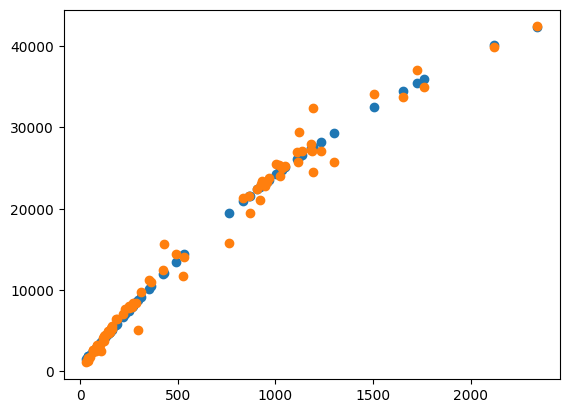

In [451]:
mul_select = {1:mull_all_one,2:combined_one}
select = 1

poly_mul_one = PolynomialFeatures(degree = 3, include_bias=False)
poly_feat_mul_one = poly_mul_one.fit_transform(mul_select[select])

poly_reg_model_mul_one = LinearRegression()
poly_fit_mul_one = poly_reg_model_mul_one.fit(poly_feat_mul_one,RF_all_one)

y_pred_mul_one = poly_fit_mul_one.predict(poly_feat_mul_one)

plt.scatter(mul_select[select],y_pred_mul_one)
plt.scatter(mul_select[select],RF_all_one)

In [452]:
r2_score(RF_all_one,y_pred_mul_one)

0.9874146873529703

In [453]:
math.sqrt(mean_squared_error(y_pred_mul_one,RF_all_one))

1273.3773505324689

In [454]:
muls_num = [[2212]]
poly_ft = poly_mul_one.fit_transform(muls_num)
poly_reg_model_mul_one.predict(poly_ft)

array([[41104.16199113]])

## Combine both into one

In [455]:
mull_all_combined = np.concatenate((mull_all_rest,mull_all_one))
DSP_all_combined = np.concatenate((DSP_all_rest,DSP_all_one))
RF_all_combined = np.concatenate((RF_all_rest,RF_all_one))

RF_select_combined = np.concatenate((RF_select_rest.reshape(RF_select_rest.shape[0]*RF_select_rest.shape[1],RF_select_rest.shape[2]),RF_select_one))



DSP_select_combined = np.concatenate((DSP_select_rest.reshape(DSP_select_rest.shape[0]*DSP_select_rest.shape[1],DSP_select_rest.shape[2]),DSP_select_one))


In [456]:
RF_select_combined.shape

(220, 19)

In [457]:
#RF_sele = 1


reg_model_combined = LinearRegression()
RF_all_combined = RF_select_combined[:,RF_sele - 1]

RF_all_combined=np.array(RF_all_combined)
mull_all_combined = np.array(mull_all_combined)

RF_all_combined = RF_all_combined.reshape(-1,1)
mull_all_combined = mull_all_combined.reshape(-1,1)

DSP_all_combined = DSP_select_combined[:,RF_sele - 1]    
DSP_all_combined=np.array(DSP_all_combined)
DSP_all_combined = DSP_all_combined.reshape(-1,1)

combined_combined =  mull_all_combined + DSP_all_combined


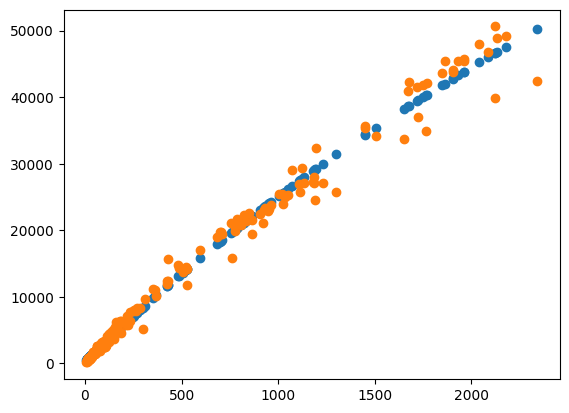

In [458]:
mul_select = {1:mull_all_combined,2:combined_combined}
select = 1

poly_mul_combined = PolynomialFeatures(degree = 3, include_bias=False)
poly_feat_mul_combined = poly_mul_combined.fit_transform(mul_select[select])

poly_reg_model_mul_combined = LinearRegression()
poly_fit_mul_combined = poly_reg_model_mul_combined.fit(poly_feat_mul_combined,RF_all_combined)

y_pred_mul_combined = poly_fit_mul_combined.predict(poly_feat_mul_combined)

plt.scatter(mul_select[select],y_pred_mul_combined)
plt.scatter(mul_select[select],RF_all_combined)

In [459]:
r2_score(y_pred_mul_combined,RF_all_combined)

0.9888494621892954

In [478]:
muls_num = [[1233]]
poly_ft = poly_mul_combined.fit_transform(muls_num)
poly_reg_model_mul_combined.predict(poly_ft)

array([[29995.75837195]])

# Linear regression for pseudorandom weights

Trained an extra 203 single-layered models with pseudorandom weights with the same distribution as the pretrained weights. Use them combined with the above regression model to improve the accuracy

In [55]:
############ Recover mult implementation of models ################
layer_num = 50
selector = []
filename = "./misc/retraining_full/test_" + str(8)  + "/reuse_" + str(1) + "/model_"
for i in range(0,layer_num,1):
    with open(filename + str(i) + "/impl.txt") as f:
        for lines in f:
            selector.append(int(lines))
f.close()

In [56]:
selector = np.ones(layer_num)

In [57]:
from tensorflow.keras.models import load_model
from qkeras.utils import _add_supported_quantized_objects
import qkeras.qtools.qtools_util
import qkeras.estimate
loaded_models = []
id_num = precision
layer_num = 50
filename = "./misc/retraining_full/test_" + str(8) + "/reuse_1/model_"
for model_no in range(layer_num):
    co = {}
    _add_supported_quantized_objects(co)
    loaded_models.append(load_model(filename + str(model_no) + '/KERAS_check_best_mode.h5', custom_objects=co))

id_num = precision
filename = "./misc/retraining_full/test_" + str(id_num) + "/reuse_" + str(RF_sele) + "/model_"
filename

'./misc/retraining_full/test_8/reuse_1/model_'

In [58]:
mull_all_new = np.concatenate((mull_all_rest,mull_all_one))
DSP_all_new = np.concatenate((DSP_all_rest,DSP_all_one))
RF_all_new = np.concatenate((RF_all_rest,RF_all_one))


In [59]:
filename + str(i)

'./misc/retraining_full/test_8/reuse_1/model_49'

In [87]:
LUT_pseudo = []
FF_pseudo = []
DSP_pseudo = []
for i in range(layer_num):
    if(selector[i]) == 1:           ##### select only models with DSP mul implementation
        #filename = "./misc/retraining/33/model_" + str(i)
        ff,lut = utils.utils.get_resources(filename + str(i),model = loaded_models[i])
        LUT_pseudo.append(lut)
        FF_pseudo.append((ff))
        DSP_pseudo.append(utils.utils.get_DSP())
FF_pseudo = np.array(FF_pseudo)
LUT_pseudo = np.array(LUT_pseudo)
DSP_pseudo = np.array(DSP_pseudo)

In [97]:
real_muls_pseudo = []
rm = reg_ff.regression.get_muls(loaded_models,layer_num)
rm = np.array(rm)
for i in range(len(rm[0])):
    #if selector[i] == 1:
        real_muls_pseudo.append(rm[:,i])
real_muls_pseudo = np.array(real_muls_pseudo)


real_muls_pseudo = real_muls_pseudo.reshape(-1,1)
FF_pseudo = FF_pseudo.reshape(-1,1)
LUT_pseudo = LUT_pseudo.reshape(-1,1)
DSP_pseudo = DSP_pseudo.reshape(-1,1)


In [99]:
FF_all = np.concatenate((RF_all_new,FF_pseudo))
all_m = np.concatenate((mull_all_new,real_muls_pseudo))
DSP = np.concatenate((DSP_all_new,DSP_pseudo))
combined_all = all_m + DSP

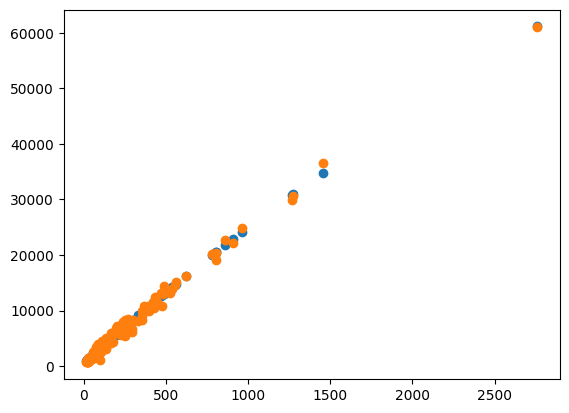

In [107]:
mul_select = {1:real_muls_pseudo,2:combined_all}
select = 1

poly_mul_pseudo = PolynomialFeatures(degree = 3, include_bias=False)
poly_feat_mul_pseudo = poly_mul_pseudo.fit_transform(mul_select[select])

poly_reg_model_mul_pseudo = LinearRegression()
poly_fit_mul_pseudo = poly_reg_model_mul_pseudo.fit(poly_feat_mul_pseudo,FF_pseudo)

y_pred_mul_pseudo = poly_fit_mul_pseudo.predict(poly_feat_mul_pseudo)

plt.scatter(mul_select[select],y_pred_mul_pseudo)
plt.scatter(mul_select[select],FF_pseudo)

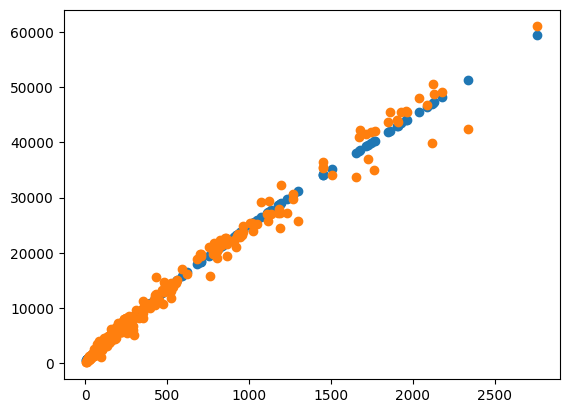

In [108]:
mul_select = {1:all_m,2:combined_all}
select = 1

poly_mul_pseudo = PolynomialFeatures(degree = 3, include_bias=False)
poly_feat_mul_pseudo = poly_mul_pseudo.fit_transform(mul_select[select])

poly_reg_model_mul_pseudo = LinearRegression()
poly_fit_mul_pseudo = poly_reg_model_mul_pseudo.fit(poly_feat_mul_pseudo,FF_all)

y_pred_mul_pseudo = poly_fit_mul_pseudo.predict(poly_feat_mul_pseudo)

plt.scatter(mul_select[select],y_pred_mul_pseudo)
plt.scatter(mul_select[select],FF_all)

In [109]:
r2_score(y_pred_mul_pseudo,FF_all)

0.9895711990314323

In [110]:
math.sqrt(mean_squared_error(y_pred_mul_pseudo,FF_all))

1215.0084284667587

In [111]:
muls_num = [[2359]]
poly_ft = poly_mul_pseudo.fit_transform(muls_num)
poly_reg_model_mul_pseudo.predict(poly_ft)

array([[51629.41796284]])

In [2106]:
model_name = "./FF_regression/poly_reg_" + str(precision) + "_" + str(RF_sele) + ".joblib"
joblib.dump(poly_reg_model_mul_rest,model_name)

['./FF_regression/poly_reg_2_3.joblib']

# Multivariable linear regression

Create a multivariable linear regression model to gather all different precisions and reuse factors into one model
The dirname contains the vitis_hls reports and the FFs are then extracted with the util library
For the linear model only the reuse factors from 1 to 5 were used, as for larger RFs the FFs have similar values and don't increase linearly

The all_layers flag decided if we take all layers into one linear model or if we separate the first layers from the rest. The final estimator contains the combined linear model

If the Vitis_HLS reports are available then the below code gathers all data into an array to create the polynomial regression model. The data is saved in a txt file in the same directory and can be retrieved with np.loadtxt(filename) and is already processed and ready for the creation of the linear model.

In [342]:
from importlib import reload
reload(reg_ff)

<module 'regression_model_ff' from '/home/dmitsas/Downloads/notebooks/regression_model_ff.py'>

In [462]:
######### this part to load the models for the LUT implementation ########

model_num = 20
FF_precision = []
DSP_precision = []
FF_precision_one = []
DSP_precision_one = []
RF_max = 5
all_layers = 1

for prec in range(2,9,1):
    precision = prec
    dir_jet = "../notebooks/jet_tagging/models/models_2/prec_" + str(prec) + "/model_"
    dir_car = "../notebooks/Cardio/models/models_2/prec_" + str(prec) + "/model_"
    dir_bc = "../notebooks/Breast_cancer/models/models_2/prec_" + str(prec) + "/model_"
    dir_arr = "../notebooks/Arrythmia/models/models_2/prec_" + str(prec) + "/model_"
    
    FF_car = reg_ff.regression.print_resource('cardio',precision,'FF',loaded_modelscar,dirname=dir_car)
    DSP_car = reg_ff.regression.print_resource('cardio',precision,'DSP',loaded_modelscar,dirname=dir_car)
    FF_bc = reg_ff.regression.print_resource('breast_cancer',precision,'FF',loaded_modelsbc,dirname=dir_bc)
    DSP_bc = reg_ff.regression.print_resource('breast_cancer',precision,'DSP',loaded_modelsbc,dirname=dir_bc)
    FF_jet = reg_ff.regression.print_resource('jet_tagging',precision,'FF',loaded_modelsjet,dirname=dir_jet)
    DSP_jet = reg_ff.regression.print_resource('jet_tagging',precision,'DSP',loaded_modelsjet,dirname=dir_jet)
    FF_arr = reg_ff.regression.print_resource('arrythmia',precision,'FF',loaded_modelsarr,dirname=dir_arr)
    DSP_arr = reg_ff.regression.print_resource('arrythmia',precision,'DSP',loaded_modelsarr,dirname=dir_arr)
    
    if all_layers:
        
        RF_select = np.concatenate((FF_arr[0:2],FF_jet[0:4],FF_bc[0:3],FF_car[0:2]))
        DSP_select = np.concatenate((DSP_arr[0:2],DSP_jet[0:4],DSP_bc[0:3],DSP_car[0:2]))

    else:
        RF_select = np.concatenate((FF_arr[1:2],FF_jet[1:4],FF_bc[1:3],FF_car[1:2]))
        DSP_select = np.concatenate((DSP_arr[1:2],DSP_jet[1:4],DSP_bc[1:3],DSP_car[1:2]))
        
        RF_select_one = np.concatenate(([FF_arr[0]],[FF_jet[0]],[FF_bc[0]],[FF_car[0]]))
        DSP_select_one = np.concatenate((DSP_arr[0],DSP_jet[0],DSP_bc[0],DSP_car[0]))
        FF_precision_one.append(RF_select_one)
        DSP_precision_one.append(DSP_select_one)

        
    FF_precision.append(RF_select)
    DSP_precision.append(DSP_select)
    
FF_precision = np.array(FF_precision)

FF_precision = FF_precision[:,:,:,0:RF_max]
DSP_precision = np.array(DSP_precision)
DSP_precision = DSP_precision[:,:,:,0:RF_max]
print(FF_precision.shape)            ###(number of precisions,number of layers,number of models,number of reuse_factors)


FF_prec = FF_precision.shape[0]
FF_layers = FF_precision.shape[1]
FF_models = FF_precision.shape[2]
FF_reuse = FF_precision.shape[3]
FF_precision = FF_precision.reshape(-1,FF_layers*FF_models,FF_reuse)
print(FF_precision.shape)

if not all_layers:
    FF_precision_one = np.array(FF_precision_one)
    FF_precision_one = FF_precision_one[:,:,:,0:RF_max]
    print(FF_precision_one.shape)

    FF_prec_one = FF_precision_one.shape[0]
    FF_layers_one = FF_precision_one.shape[1]
    FF_models_one = FF_precision_one.shape[2]
    FF_reuse_one = FF_precision_one.shape[3]
    FF_precision_one = FF_precision_one.reshape(-1,FF_layers_one*FF_models_one,FF_reuse_one)
    print(FF_precision_one.shape)

#############################################################

In [463]:
model_num = 20
FF_precision = []
DSP_precision = []
FF_precision_one = []
DSP_precision_one = []
RF_max = 5
all_layers = 1

for prec in range(2,9,1):
    precision = prec

    FF_car = reg_ff.regression.print_resource('cardio',precision,'FF',loaded_modelscar)
    DSP_car = reg_ff.regression.print_resource('cardio',precision,'DSP',loaded_modelscar)
    FF_bc = reg_ff.regression.print_resource('breast_cancer',precision,'FF',loaded_modelsbc)
    DSP_bc = reg_ff.regression.print_resource('breast_cancer',precision,'DSP',loaded_modelsbc)
    FF_arr = reg_ff.regression.print_resource('arrythmia',precision,'FF',loaded_modelsarr)
    DSP_arr = reg_ff.regression.print_resource('arrythmia',precision,'DSP',loaded_modelsarr)
    FF_jet = reg_ff.regression.print_resource('jet_tagging',precision,'FF',loaded_modelsjet)
    DSP_jet = reg_ff.regression.print_resource('jet_tagging',precision,'DSP',loaded_modelsjet)
    
    if all_layers:
        
        RF_select = np.concatenate((FF_arr[0:2],FF_jet[0:4],FF_bc[0:3],FF_car[0:2]))
        DSP_select = np.concatenate((DSP_arr[0:2],DSP_jet[0:4],DSP_bc[0:3],DSP_car[0:2]))

    else:
        RF_select = np.concatenate((FF_arr[1:2],FF_jet[1:4],FF_bc[1:3],FF_car[1:2]))
        DSP_select = np.concatenate((DSP_arr[1:2],DSP_jet[1:4],DSP_bc[1:3],DSP_car[1:2]))
        
        RF_select_one = np.concatenate(([FF_arr[0]],[FF_jet[0]],[FF_bc[0]],[FF_car[0]]))
        DSP_select_one = np.concatenate((DSP_arr[0],DSP_jet[0],DSP_bc[0],DSP_car[0]))
        FF_precision_one.append(RF_select_one)
        DSP_precision_one.append(DSP_select_one)

        
    FF_precision.append(RF_select)
    DSP_precision.append(DSP_select)
    
FF_precision = np.array(FF_precision)

FF_precision = FF_precision[:,:,:,0:RF_max]
DSP_precision = np.array(DSP_precision)
DSP_precision = DSP_precision[:,:,:,0:RF_max]
print(FF_precision.shape)            ###(number of precisions,number of layers,number of models,number of reuse_factors)


FF_prec = FF_precision.shape[0]
FF_layers = FF_precision.shape[1]
FF_models = FF_precision.shape[2]
FF_reuse = FF_precision.shape[3]
FF_precision = FF_precision.reshape(-1,FF_layers*FF_models,FF_reuse)
print(FF_precision.shape)

if not all_layers:
    FF_precision_one = np.array(FF_precision_one)
    FF_precision_one = FF_precision_one[:,:,:,0:RF_max]
    print(FF_precision_one.shape)

    FF_prec_one = FF_precision_one.shape[0]
    FF_layers_one = FF_precision_one.shape[1]
    FF_models_one = FF_precision_one.shape[2]
    FF_reuse_one = FF_precision_one.shape[3]
    FF_precision_one = FF_precision_one.reshape(-1,FF_layers_one*FF_models_one,FF_reuse_one)
    print(FF_precision_one.shape)

np.set_printoptions(threshold=sys.maxsize)

(7, 11, 20, 5)
(7, 220, 5)


In [464]:
%%time
real_muls_arr = reg_ff.regression.get_muls(loaded_modelsarr)
real_muls_jet = reg_ff.regression.get_muls(loaded_modelsjet)
real_muls_bc  = reg_ff.regression.get_muls(loaded_modelsbc)
real_muls_car = reg_ff.regression.get_muls(loaded_modelscar)

real_muls_arr_rest = np.delete(real_muls_arr,0,0)
real_muls_jet_rest = np.delete(real_muls_jet,0,0)
real_muls_bc_rest  = np.delete(real_muls_bc,0,0)
real_muls_car_rest = np.delete(real_muls_car,0,0)

real_muls_rest = np.concatenate((real_muls_arr_rest,real_muls_jet_rest,real_muls_bc_rest,real_muls_car_rest))
real_muls_rest = np.array(real_muls_rest)

real_muls_arr_one = [real_muls_arr[0]]
real_muls_jet_one = [real_muls_jet[0]]
real_muls_bc_one  = [real_muls_bc[0]]
real_muls_car_one = [real_muls_car[0]]

real_muls_one = np.concatenate((real_muls_arr_one,real_muls_jet_one,real_muls_bc_one,real_muls_car_one))
real_muls_one = np.array(real_muls_one)

CPU times: user 1.64 s, sys: 1.81 ms, total: 1.64 s
Wall time: 1.64 s


In [465]:
if all_layers:
    real_muls_all = np.concatenate((real_muls_arr,real_muls_jet,real_muls_bc,real_muls_car))
else:
    real_muls_all = real_muls_rest
   



In [466]:
FF_precision.shape

(7, 220, 5)

In [467]:
real_muls = []
real_muls_one_all = []
for i in range(FF_prec):
    for j in range(FF_layers):
        for z in range(FF_models):
            for k in range(FF_reuse):
                real_muls.append(real_muls_all[j,z])
                
if not all_layers:
    for i in range(FF_prec_one):
        for j in range(FF_layers_one):
            for z in range(FF_models_one):
                for k in range(FF_reuse_one):
                    real_muls_one_all.append(real_muls_one[j,z])
real_muls = np.array(real_muls)
real_muls_one_all = np.array(real_muls_one_all)
print(real_muls.shape)
print(real_muls_one_all.shape)

(7700,)
(0,)


In [468]:
precision_array = []


for prec in range(FF_prec):
    precision_array.append(np.zeros(FF_layers*FF_models*FF_reuse).astype("int") + (2 + prec))
precision_array = np.array(precision_array)
print(precision_array.shape)        #(number of precision,total layers*models*reuse)
precision_array = precision_array.reshape(-1,FF_layers*FF_models,FF_reuse)    ###(precisions,layers*models,reuse)


if not all_layers:
    precision_array_one = []
    for prec in range(FF_prec_one):
        precision_array_one.append(np.zeros(FF_layers_one*FF_models_one*FF_reuse_one).astype("int") + (2 + prec))
    precision_array_one = np.array(precision_array_one)
    print(precision_array_one.shape)        #(number of precision,total layers*models*reuse)
    precision_array_one = precision_array_one.reshape(-1,FF_layers_one*FF_models_one,FF_reuse_one)    ###(precisions,layers*models,reuse)



(7, 1100)


In [469]:
# reuse_array = []
# for i in range(FF_models*FF_layers):
#     for j in range(0,FF_reuse,1):
#         reuse_array.append(np.ones(FF_reuse) + j)
# reuse_array = np.array(reuse_array)

In [470]:
reuse_array = []
for z in range(FF_prec):
    for i in range(FF_models*FF_layers):
        for j in range(FF_reuse):
            if j < 10:
                reuse_array.append(np.ones(1).astype("int") + j)
            else:
                reuse_array.append(np.zeros(1).astype("int") + (j + 2 -10) * 10)

reuse_array = np.array(reuse_array)

reuse_array = reuse_array.reshape(FF_prec,FF_layers*FF_models,FF_reuse)
print(reuse_array.shape)

if not all_layers:
    reuse_array_one = []
    for z in range(FF_prec_one):
        for i in range(FF_models_one*FF_layers_one):
            for j in range(FF_reuse_one):
                reuse_array_one.append(np.ones(1).astype("int") + j)

    reuse_array_one = np.array(reuse_array_one)

    reuse_array_one = reuse_array_one.reshape(FF_prec_one,FF_layers_one*FF_models_one,FF_reuse_one)
    print(reuse_array_one.shape)

(7, 220, 5)


In [471]:
precision_array = precision_array.reshape(-1)
reuse_array = reuse_array.reshape(-1)
FF_precision = FF_precision.reshape(-1)

print(precision_array.shape)

if not all_layers:
    precision_array_one = precision_array_one.reshape(-1)
    reuse_array_one = reuse_array_one.reshape(-1)
    FF_precision_one = FF_precision_one.reshape(-1)

    print(precision_array_one.shape)

(7700,)


In [487]:
data = pd.DataFrame((real_muls,reuse_array,precision_array,FF_precision))

data = data.transpose()
print(data)

if not all_layers:
    data_one = pd.DataFrame((real_muls_one_all,reuse_array_one,precision_array_one,FF_precision_one))

    data_one = data_one.transpose()
    #data_one = data_one.drop(columns=3)
    print(data_one)



        0  1  2     3
0     122  1  2  2350
1     122  2  2   971
2     122  3  2   931
3     122  4  2   927
4     122  5  2   927
...   ... .. ..   ...
7695   53  1  8  1840
7696   53  2  8  1084
7697   53  3  8  1071
7698   53  4  8  1047
7699   53  5  8  1047

[7700 rows x 4 columns]


In [488]:
FF_precision.max()

50614

In [486]:
########## Skip to this step if the data is already provided in a txt file ########

data = data.drop(columns=3)

poly_multi = PolynomialFeatures(degree = 4, include_bias=False)
poly_feat_multi = poly_multi.fit_transform(data)

poly_reg_model_multi = LinearRegression()
poly_fit_multi = poly_reg_model_multi.fit(poly_feat_multi,FF_precision)

y_pred_multi = poly_fit_multi.predict(poly_feat_multi)

plt.scatter(data[0],y_pred_multi)
plt.scatter(data[0],FF_precision)
plt.annotate("r^2 = " + str(r2_score(FF_precision,y_pred_multi)),(0,FF_p))
plt.xlabel("Real multiplications")
plt.ylabel("FFs")

KeyError: '[3] not found in axis'

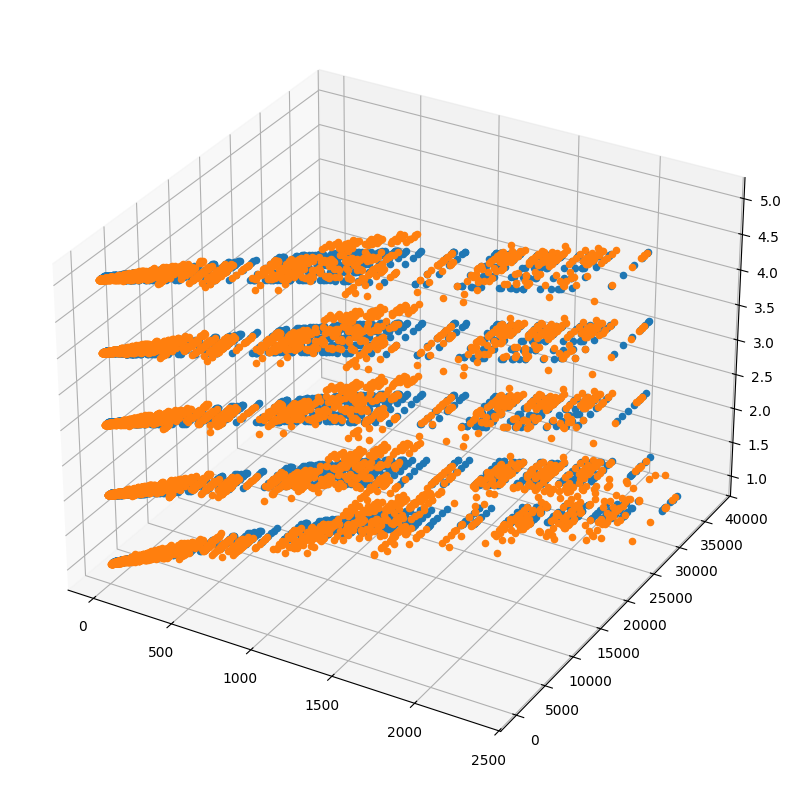

In [355]:
ax = plt.figure(figsize=(18,10)).add_subplot(projection='3d')
ax.scatter(data[0],y_pred_multi,zs = data[1],zdir='z',depthshade=False)
ax.scatter(data[0],FF_precision,zs = data[1],zdir = 'z',depthshade=False)

In [474]:
r2_score(FF_precision,y_pred_multi)

0.9848221196316138

In [475]:
if not all_layers:
    poly_multi_one = PolynomialFeatures(degree = 4, include_bias=False)
    poly_feat_multi_one = poly_multi_one.fit_transform(data_one)

    poly_reg_model_multi_one = LinearRegression()
    poly_fit_multi_one = poly_reg_model_multi_one.fit(poly_feat_multi_one,FF_precision_one)

    y_pred_multi_one = poly_fit_multi_one.predict(poly_feat_multi_one)

    plt.scatter(data_one[0],y_pred_multi_one)
    plt.scatter(data_one[0],FF_precision_one)

    plt.annotate("r^2 = " + str(r2_score(FF_precision_one,y_pred_multi_one)),(0,48000))
    plt.xlabel("Real multiplications")
    plt.ylabel("FFs")

In [477]:
mul = 1233
reuse = 1
prec = 8
end=pd.DataFrame([[mul,reuse,prec]])
end=poly_multi.fit_transform(end)
poly_fit_multi.predict(end)

array([29437.83022328])

In [552]:
joblib.dump(poly_reg_model_multi,"./FF_regression/multi_poly.joblib")

['./FF_regression/multi_poly.joblib']

In [537]:
joblib.dump(poly_reg_model_multi_one,"./FF_regression/multi_poly_one.joblib")

['./FF_regression/multi_poly_one.joblib']

# Try a linear model to quantify the drop in LUTs with the increase of RF

In [325]:
precision = 8

LUT_car = reg_ff.regression.print_resource('cardio',precision,'LUT',loaded_modelscar)
DSP_car = reg_ff.regression.print_resource('cardio',precision,'DSP',loaded_modelscar)
LUT_bc = reg_ff.regression.print_resource('breast_cancer',precision,'LUT',loaded_modelsbc)
DSP_bc = reg_ff.regression.print_resource('breast_cancer',precision,'DSP',loaded_modelsbc)
LUT_arr = reg_ff.regression.print_resource('arrythmia',precision,'LUT',loaded_modelsarr)
DSP_arr = reg_ff.regression.print_resource('arrythmia',precision,'DSP',loaded_modelsarr)
LUT_jet = reg_ff.regression.print_resource('jet_tagging',precision,'LUT',loaded_modelsjet)
DSP_jet = reg_ff.regression.print_resource('jet_tagging',precision,'DSP',loaded_modelsjet)

In [326]:
LUT = np.concatenate((LUT_car,LUT_bc,LUT_arr,LUT_jet))

In [327]:
dif1 = LUT[:,:,0]- LUT[:,:,1]

dif1 = dif1.reshape(-1,1)
real_muls_all = real_muls_all.reshape(-1,1)
lut = LUT[:,:,0].reshape(-1,1)

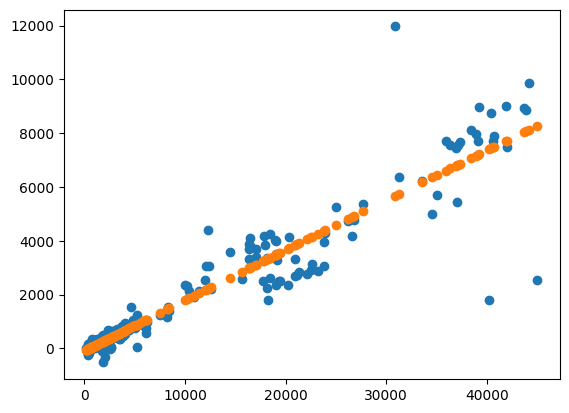

In [328]:
lut_poly = PolynomialFeatures(degree=2,include_bias=False)
lut_poly_ft = lut_poly.fit_transform(lut)
# lut_poly_ft = 1/np.log(real_muls_all) 

lut_model = LinearRegression()
lut_model_fit = lut_model.fit(lut_poly_ft,dif1)

lut_pred = lut_model.predict(lut_poly_ft)

plt.scatter(lut,dif1)
plt.scatter(lut,lut_pred)

In [472]:
r2_score(dif1,lut_pred)

0.8773653013739967

In [404]:
# lut_precision.append(lut_model.coef_[0])

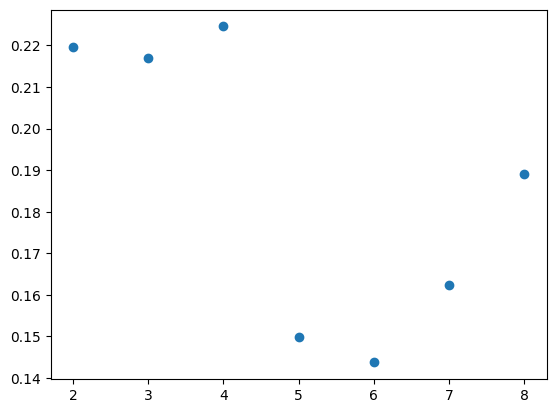

In [417]:
plt.scatter(precision_arr,lut_precision[:,0])

In [335]:
lut_filename = "./LUT_regression/lut_regression.joblib"

In [336]:
if os.path.exists(lut_filename):
    joblib.dump(lut_model,lut_filename)
else:
    os.mkdir("./LUT_regression")
    joblib.dump(lut_model,lut_filename)